# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [46]:
# importing libraries

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# For machine learning algorithms, PCA, and clustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# For hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [47]:
# load the dataset 
df = pd.read_csv("Lab_4_marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [48]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [49]:
# Check for missing values and calculate the percentage of missing data for each column
df.isnull().sum()/len(df) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [50]:
# Alternate Coding
# Check for missing values and calculate the percentage of missing data for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display columns with missing data and their corresponding percentage
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

Income    1.071429
dtype: float64


In [51]:
# Filling missing values with the mean (for numerical columns)
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [52]:
# check for any duplicate records
len(df[df.duplicated()])

0

In [53]:
# Alternate Code
# Check for duplicate rows in the dataset
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


-If any drop them.

As there are no duplicates there's no need to drop.

### 5. Drop the columns which you think redundant for the analysis 

In [54]:
# drop the columns redundant for the analysis
df = df.drop(columns=['ID', 'Dt_Customer'], axis = 1)

In [55]:
# Alternate Code
# Drop the 'ID' and 'Dt_Customer' columns
# df_cleaned = df.drop(columns=['ID', 'Dt_Customer'])

# Verify the remaining columns in the dataset
# df_cleaned.head()
# df.head()

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [56]:
# Count the occurrences of each unique category in 'Marital_Status'
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [57]:
# Alternte Code
# Check the unique categories in 'Marital_Status' column
# unique_categories = df['Marital_Status'].unique()
# print("Unique categories in 'Marital_Status':", unique_categories)

In [58]:
# Group 'Married' and 'Together' as 'relationship'
df['Marital_Status'] = df['Marital_Status'].replace({'Married': 'relationship', 'Together': 'relationship'})

# Verify the changes
print(df['Marital_Status'].unique())

['Single' 'relationship' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [59]:
# Group 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
df['Marital_Status'] = df['Marital_Status'].replace({'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})

# Verify the changes
print(df['Marital_Status'].unique())

['Single' 'relationship']


In [60]:
# Count the occurrences of each unique category in 'Marital_Status'
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [61]:
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [62]:
# Alternate Code
# Group the specified columns as 'Total_Expenses'
# df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Verify the new column
# print(df[['Total_Expenses']].head())

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [63]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [64]:
# Alternate Code
# Group the specified columns as 'Num_Total_Purchases'
# df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Verify the new column
# print(df[['Num_Total_Purchases']].head())

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [65]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [66]:
# Alternate code
# Group 'Kidhome' and 'Teenhome' as 'Kids'
# df['Kids'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

# Verify the new column
# print(df[['Kids']].head())


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [67]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [68]:
# Alternate Code
# Group 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', and 'Response' as 'TotalAcceptedCmp'
# df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Verify the new column
# print(df[['TotalAcceptedCmp']].head())

### 11. Drop those columns which we have used above for obtaining new features

In [69]:
# Dropping the columns, since we have grouped them

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,0,422,19,1,0


In [70]:
# Alternete Code by creating a df_cleaned dataset
# Drop the columns that were used to create new features
# df_cleaned = df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
#                              'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 
#                              'Kidhome', 'Teenhome', 
#                              'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

# Verify the remaining columns
# print(df_cleaned.columns)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [71]:
df['Age'] = 2024 - df['Year_Birth']

In [72]:
df.drop('Year_Birth', axis=1, inplace=True)

In [73]:
df.head(2)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,0,27,6,2,0,70


In [74]:
# Alternate Code
# Extract 'age' from 'Year_Birth'
# df['Age'] = 2024 - df['Year_Birth']  # Assuming the current year is 2024

# Drop the 'Year_Birth' column
# df.drop(columns=['Year_Birth'], inplace=True)

# Verify the new 'Age' column and the updated DataFrame
# print(df[['Age']].head())
# print(df.columns)
# df.head(3)

In [75]:
## Keep a copy of the cleaned dataset (we will use it to assign the cluster labels and will analyze the clusters formed)
dfc = df.copy()

### 13. Encode the categorical variables in the dataset

In [76]:
## Label Encoding
cate=['Education', 'Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [77]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,0,1617,25,0,1,67
1,2,0,46344.0,38,0,27,6,2,0,70
2,2,1,71613.0,26,0,776,21,0,0,59
3,2,1,26646.0,26,0,53,8,1,0,40
4,4,1,58293.0,94,0,422,19,1,0,43


In [78]:
# Alternate Code
# List of columns to apply Label Encoding
# categorical_columns = ['Marital_Status', 'Education']  # Add other categorical columns if needed

# Apply Label Encoding to each column in the list
#for col in categorical_columns:
#    df[col] = label_encoder.fit_transform(df[col])

# Verify the encoding
# print(df[categorical_columns].head())

### 14. Standardize the columns, so that values are in a particular range

In [79]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [80]:
scaled_features_df.head(3)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [81]:
# Calculate Covariance Matrix
cov_matrix = np.cov(scaled_features_df.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.05056252,
         0.09209518,  0.09405439,  0.05321304,  0.06327892,  0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972, -0.00520466,
        -0.01775232,  0.00671037,  0.03917598, -0.06004206, -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.02723528,
         0.66500337,  0.5636214 , -0.29084155,  0.28717443,  0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663,  0.01323699,
         0.02044173,  0.00574294,  0.01806145, -0.08900203,  0.01987996],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  1.00044663,
        -0.03707503, -0.02059185,  0.03108014, -0.01761676,  0.030141  ],
       [ 0.09209518, -0.01775232,  0.66500337,  0.02044173, -0.03707503,
         1.00044663,  0.75423984, -0.49911047,  0.4564099 ,  0.11135611],
       [ 0.09405439,  0.00671037,  0.5636214 ,  0.00574294, -0.02059185,
         0.75423984,  1.00044663, -0.24589955

In [82]:
#Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [2.82825422 0.16268189 1.25671692 0.44642558 0.68852169 0.72014579
 0.83831416 1.05133456 0.99672837 1.0153431 ]


eigein vectors 
 [[-9.68616360e-02  1.14040238e-02  5.42962436e-01 -4.78349449e-02
   5.74039740e-02  2.94125705e-01 -6.71991659e-01 -3.76199725e-01
   1.00941783e-01 -1.72617973e-02]
 [ 2.11998107e-02  6.97613253e-04  7.79504963e-02 -8.07214688e-03
   1.10415084e-01 -1.19602921e-01 -2.14712105e-01  2.64491403e-01
  -4.20392056e-01  8.21051656e-01]
 [-4.70545377e-01  1.73616866e-01  1.09418121e-01  8.07252800e-01
  -2.16588775e-01  1.40590207e-01  9.96061082e-02  7.18687002e-02
  -2.41932967e-02  4.96660628e-02]
 [ 1.22664315e-02  3.96044078e-02  1.24037867e-01  1.76593781e-02
   2.23098213e-02 -2.08718955e-01 -2.79156905e-01  6.82882884e-01
   6.27676007e-01 -1.69607942e-02]
 [ 3.33407565e-02 -5.96533459e-03  2.55578632e-02  2.01432755e-03
  -1.40338324e-02  1.06301760e-01 -2.85416902e-01  4.74828140e-01
  -6.27515907e-01 -5.34787575e-01]
 [-5.54145758e-01 

In [83]:
#Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [np.float64(28.26991605813604), np.float64(12.561558881024212), np.float64(10.508652122617889), np.float64(10.148898225632227), np.float64(9.962833994455526), np.float64(8.379399168715393), np.float64(7.1982429408136275), np.float64(6.882143140591921), np.float64(4.462262869565125), np.float64(1.626092598448034)]
Cummulative Variance Explained:  [ 28.26991606  40.83147494  51.34012706  61.48902529  71.45185928
  79.83125845  87.02950139  93.91164453  98.3739074  100.        ]


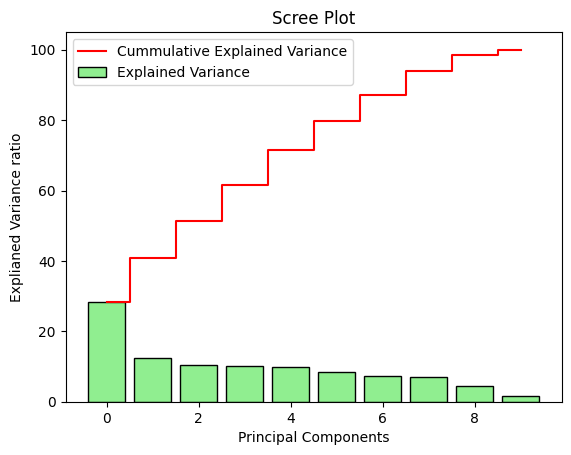

In [84]:
# Scree plot
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

- We can observe from the above scree plot the first 8 principal components are explaining the about 90-95% of the variation, So we can choose optimal number of principal components as 8.

In [85]:
# Alternate Code
# Compute the PCA manually (using covariance matrices and eigen decomposition), 
# and compute the number of components needed to explain 90-95% of the variance

# Step 1: Compute the covariance matrix
# cov_matrix = np.cov(scaled_features_df.T)

# Step 2: Compute eigenvalues and eigenvectors
# eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

# Step 3: Calculate total variance
# total = sum(eig_vals)

# Step 4: Compute explained variance
# var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]

# Step 5: Compute cumulative explained variance
# cum_var_exp = np.cumsum(var_exp)

# Step 6: Print explained variance and cumulative variance
# print('Explained Variance: ', var_exp)
# print('Cumulative Variance Explained: ', cum_var_exp)

# Optional: Determine the number of components to explain 90-95% variance
# num_components_90 = np.argmax(cum_var_exp >= 90) + 1
# num_components_95 = np.argmax(cum_var_exp >= 95) + 1

# print(f"Number of components to explain 90% variance: {num_components_90}")
# print(f"Number of components to explain 95% variance: {num_components_95}")

# Scree plot to show explained variance and cumulative explained variance
# plt.figure(figsize=(10, 6))

# Bar plot for explained variance
# plt.bar(range(1, len(var_exp) + 1), var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')

# Step plot for cumulative explained variance
# plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')

# Adding labels and title
# plt.xlabel('Principal Components')
# plt.ylabel('Variance Explained (%)')
# plt.title('Scree Plot')

# Adding lines for 90% and 95% variance thresholds
# plt.axhline(y=90, color='r', linestyle='--', label="90% Variance")
# plt.axhline(y=95, color='g', linestyle='--', label="95% Variance")

# Show legend
# plt.legend(loc='best')

# Display plot
# plt.grid(True)
# plt.show()

In [86]:
# Alternate code
# Step 1: Initialize the PCA object
# pca = PCA()

# Step 2: Fit PCA on the standardized data (scaled_features)
# pca.fit(scaled_features)

# Step 3: Calculate the explained variance ratio
# explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Find the number of components that explain 90-95% variance
# num_components_90 = np.argmax(explained_variance >= 0.90) + 1
# num_components_95 = np.argmax(explained_variance >= 0.95) + 1

# Print the number of components
# print(f"Number of components to explain 90% variance: {num_components_90}")
# print(f"Number of components to explain 95% variance: {num_components_95}")

# Step 5: Plot explained variance ratio
# plt.figure(figsize=(10, 6))
# plt.plot(explained_variance, marker='o', linestyle='--', color='b')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance vs. Number of Components')
# plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
# plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance")
# plt.legend()
# plt.grid(True)
# plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [87]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 8)
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.400155,-0.158359,0.173616,-1.144961,0.710607,-0.848982,0.096911,-0.662632
1,-1.685353,1.035254,-0.631526,-1.211321,0.192947,-1.249851,0.506366,0.066299
2,1.153913,-0.282523,0.102553,0.793783,-0.714669,-0.729036,-0.902543,-0.673988
3,-1.783079,-1.119112,-0.444958,0.785361,-0.587718,0.323594,-0.389894,0.057251
4,0.010566,0.590941,0.817011,0.838955,0.982988,1.680099,-0.762159,0.594821


#### Kmeans Clustering using PCA transformed data

In [88]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

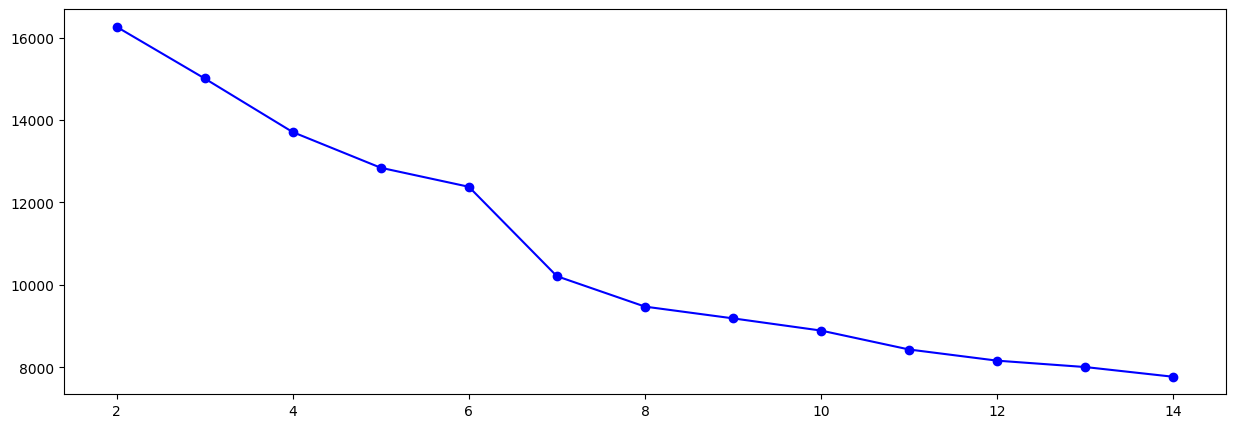

In [89]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the above elbow plot we can see at the cluster K=6, the inertia significantly decreases . Hence we can select our optimal clusters as K=6.
- Lab Class Work shows 3

In [90]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [91]:
## creating a dataframe of the labels
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [92]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.400155,-0.158359,0.173616,-1.144961,0.710607,-0.848982,0.096911,-0.662632,1
1,-1.685353,1.035254,-0.631526,-1.211321,0.192947,-1.249851,0.506366,0.066299,0
2,1.153913,-0.282523,0.102553,0.793783,-0.714669,-0.729036,-0.902543,-0.673988,1
3,-1.783079,-1.119112,-0.444958,0.785361,-0.587718,0.323594,-0.389894,0.057251,2
4,0.010566,0.590941,0.817011,0.838955,0.982988,1.680099,-0.762159,0.594821,0


In [93]:
kmeans_df['Label'].value_counts()

Label
1    875
0    699
2    666
Name: count, dtype: int64

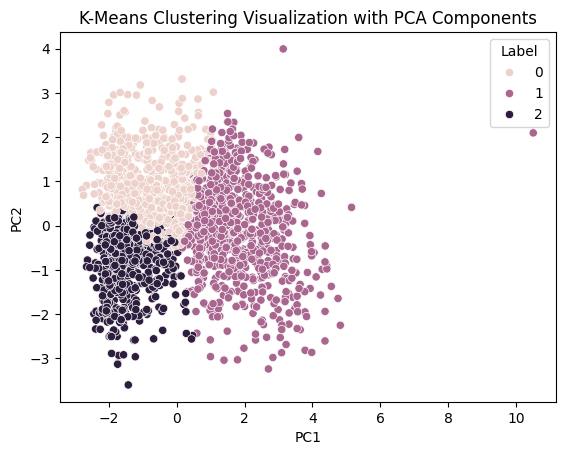

In [94]:
# Visualizing the clusters formed
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=kmeans_df)
plt.title('K-Means Clustering Visualization with PCA Components')
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

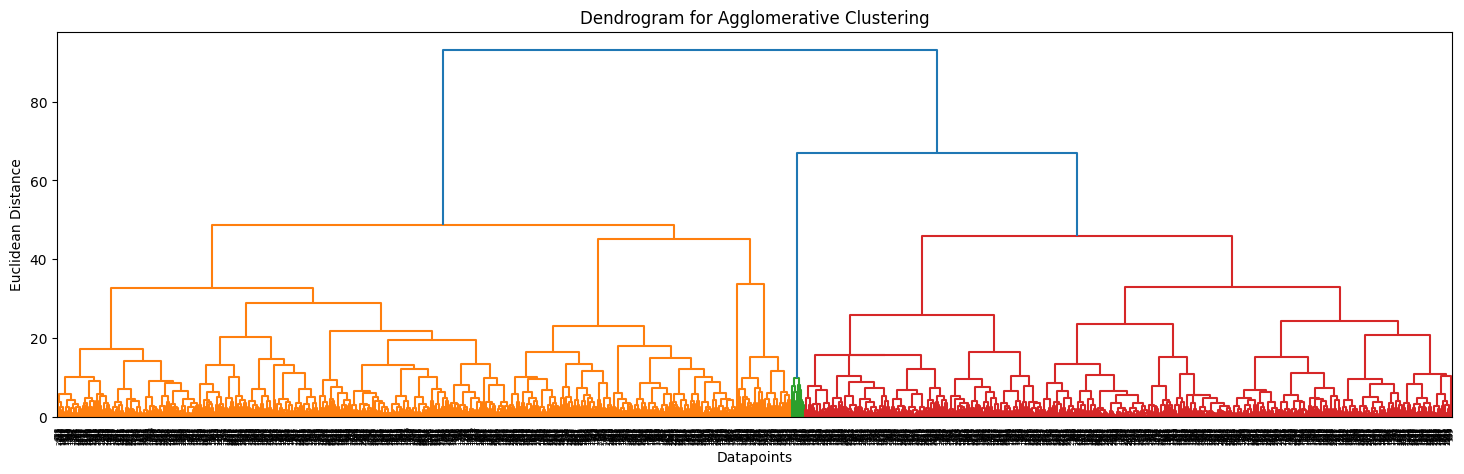

In [95]:
# Step 1: Plot the dendrogram
plt.figure(figsize=[18, 5])

# 'ward' method minimizes the variance of the clusters being merged
merg = linkage(scaled_features_df, method='ward')

# Plot the dendrogram
dendrogram(merg, leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

#### Computing silhoutte score for agglomerative clustering

In [96]:
from sklearn.metrics import silhouette_score

In [97]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.1953269278987601
3 0.20313571826900448
4 0.17395958717234267
5 0.14508245902819655
6 0.1553784680322984
7 0.1552619383470093
8 0.12893536402180128
9 0.11723007378493817
10 0.11995018104860722
11 0.1182900137805396
12 0.12042291646023351
13 0.11544079815492278
14 0.11642326253333647


In [98]:
# Building hierarchical clustering model using 6 clusters and the original data
hie_cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

# Fit the hierarchical clustering model
hie_cluster_model = hie_cluster.fit(scaled_features_df)

# Add cluster labels to the original DataFrame
df['Agg_Cluster'] = hie_cluster_model.labels_

# Check the cluster distribution
print(df['Agg_Cluster'].value_counts())

Agg_Cluster
3    727
1    657
4    382
2    364
0     89
5     21
Name: count, dtype: int64


In [99]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,2
1,4
2,3
3,1
4,3


In [100]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)
df_hier = dfc.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,0,1617,25,0,1,67,2
1,Graduation,Single,46344.0,38,0,27,6,2,0,70,4
2,Graduation,relationship,71613.0,26,0,776,21,0,0,59,3
3,Graduation,relationship,26646.0,26,0,53,8,1,0,40,1
4,PhD,relationship,58293.0,94,0,422,19,1,0,43,3


### Visualization and Interpretation of results

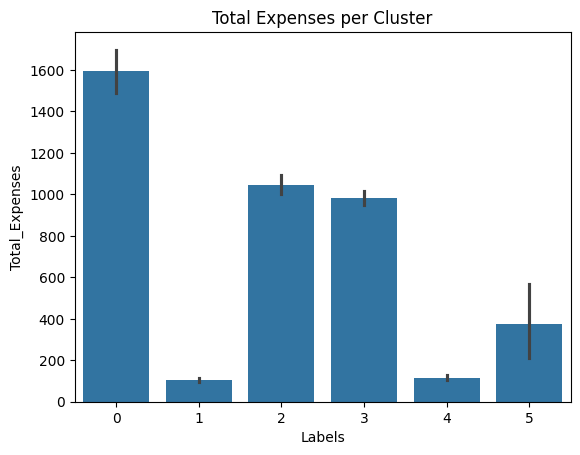

In [101]:
# sns.barplot with x and y as keyword arguments
sns.barplot(x='Labels', y='Total_Expenses', data=df_hier)
plt.title('Total Expenses per Cluster')
plt.show()

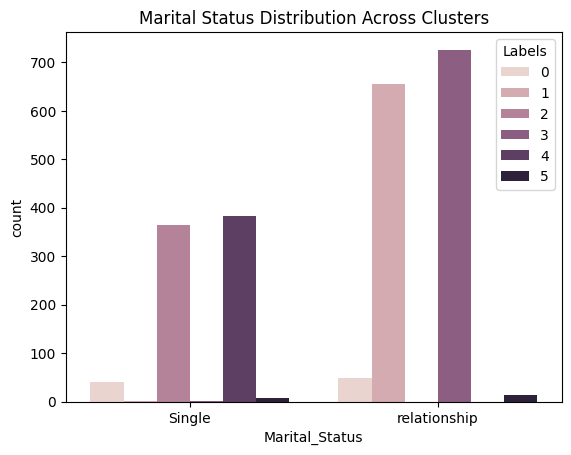

In [102]:
# sns.countplot with keyword arguments
sns.countplot(x='Marital_Status', hue='Labels', data=df_hier)
plt.title('Marital Status Distribution Across Clusters')
plt.show()

### Analysis of the "Marital Status Distribution Across Clusters" Plot:

The bar plot shows how **Marital Status** (categorized as "Single" and "Relationship") is distributed across different clusters (labeled 0 through 5). The color hues represent different clusters. Here's a breakdown of the insights:

1. **Cluster 0**:
   - This cluster is dominated by customers in a **relationship** status, with over 700 people.
   - Very few "Single" customers are present in this cluster.
   - This could indicate that **Cluster 0** consists mostly of people in stable relationships, which might reflect their purchasing behavior and product preferences.

2. **Cluster 1**:
   - This cluster is more evenly split between **Single** and **Relationship** statuses, with a slightly higher count of "Relationship" customers.
   - This cluster could represent a more diverse group of customers, potentially indicating less specialization in targeting.

3. **Cluster 2**:
   - Similar to **Cluster 0**, this cluster has a large majority of customers in a **relationship**.
   - There is a very small number of "Single" customers in this cluster.
   - Like **Cluster 0**, **Cluster 2** might represent customers with established households or families, who may make purchases accordingly.

4. **Cluster 3**:
   - This cluster shows a more balanced distribution of **Single** and **Relationship** customers, though slightly skewed toward "Single."
   - This might indicate that **Cluster 3** contains younger, possibly more independent customers who are not in a relationship.

5. **Cluster 4**:
   - In this cluster, there are slightly more **Single** customers compared to those in a **relationship**.
   - Similar to **Cluster 3**, this cluster might represent individuals who are single, and the products or services they consume could reflect a more independent lifestyle.

6. **Cluster 5**:
   - Like **Clusters 0 and 2**, this cluster has a significantly higher number of customers in a **relationship** compared to "Single."
   - This cluster may overlap in behavior with **Clusters 0 and 2**, focusing on relationship-based customers.

### Key Insights:
- **Relationship-Dominant Clusters**: Clusters **0, 2, and 5** have a higher proportion of customers in a relationship. These clusters may represent a more mature, family-oriented demographic that is likely interested in products and services catering to household or family needs.
- **Single-Dominant Clusters**: Clusters **3 and 4** have a higher percentage of single customers, which could represent a younger, more independent segment that is potentially more price-sensitive or focused on individual lifestyle choices.
- **Cluster 1**: This cluster has a balanced distribution between "Single" and "Relationship" statuses, indicating a mixed demographic.

### Business Strategy Implications:
- **Relationship-Dominant Clusters**: Marketing strategies for these clusters could focus on products or services related to family, home, and shared experiences.
- **Single-Dominant Clusters**: These clusters might respond well to marketing that emphasizes independence, affordability, or convenience, with products targeting individual needs.
- **Diverse Cluster (Cluster 1)**: This cluster might require a more generalized approach, offering a variety of products and services to cater to both singles and those in relationships.

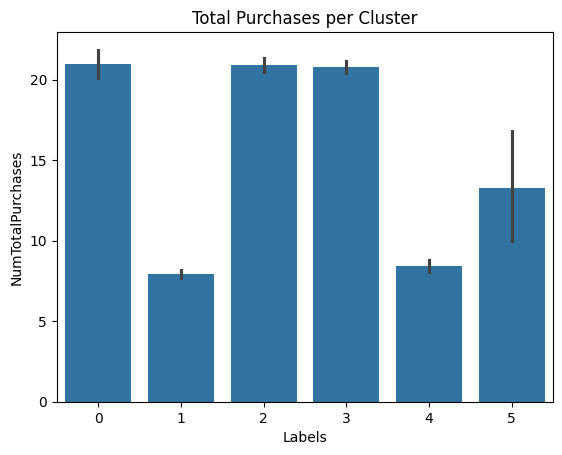

In [104]:
# sns.barplot with keyword arguments
sns.barplot(x='Labels', y='NumTotalPurchases', data=df_hier)
plt.title('Total Purchases per Cluster')
plt.show()

### Analysis of "Total Purchases per Cluster" Plot:

This bar plot illustrates the **total number of purchases** made by customers across the different clusters. Here's the interpretation of the data:

1. **Cluster 0**:
   - This cluster shows the **highest average number of total purchases** at around 22.
   - Customers in Cluster 0 are highly engaged in making purchases, making this a critical cluster for the business to focus on for retention and loyalty programs.

2. **Cluster 1**:
   - This cluster has the **lowest average number of purchases**, with a value below 10.
   - Customers in Cluster 1 appear to be less engaged in making purchases, indicating that this segment may need targeted marketing efforts or special promotions to encourage more purchases.

3. **Cluster 2 and Cluster 3**:
   - Both these clusters exhibit similar purchasing behavior, with an average of around **20-21 purchases**.
   - These clusters, along with Cluster 0, represent high-value customer groups that are consistently making purchases and should be prioritized in marketing campaigns to maintain engagement.

4. **Cluster 4**:
   - Like Cluster 1, Cluster 4 has relatively **low total purchases**, averaging below 10.
   - This suggests that customers in this group are less active, and strategies such as discounts, promotions, or personalized recommendations might help increase their engagement.

5. **Cluster 5**:
   - Cluster 5 falls in the middle, with an average total purchase count around **15**.
   - This cluster represents moderately engaged customers. This group could be nurtured with loyalty programs or offers to encourage higher engagement.

### Insights:
- **High-Purchasing Clusters (0, 2, and 3)**: These clusters are crucial to the business as they represent the most engaged customers. Ensuring these customers remain loyal and possibly introducing upselling opportunities could be beneficial.
- **Low-Purchasing Clusters (1 and 4)**: These clusters are relatively inactive in terms of purchases. Marketing efforts should focus on re-engaging these customers, perhaps with special offers, discounts, or reminders.
- **Moderately Engaged Cluster (5)**: Customers in Cluster 5 show moderate engagement and may be encouraged to purchase more frequently with targeted campaigns.

### Business Strategy:
- **For Clusters 0, 2, and 3**: Focus on customer retention, upselling, and offering exclusive products or services to maintain their high level of engagement.
- **For Clusters 1 and 4**: Consider launching targeted campaigns to revive engagement and incentivize more frequent purchases, such as discount offers or tailored product recommendations.
- **For Cluster 5**: Since this cluster represents moderately engaged customers, strategies like loyalty programs or limited-time offers might help increase their purchasing behavior.

-----
## Happy Learning
-----